[[8 7 0 1 4 2 4 8]
 [1 1 5 1 0 5 7 6]
 [1 7 9 5 7 3 7 5]
 [6 6 2 7 6 0 9 6]
 [1 5 9 5 8 0 0 8]
 [8 6 7 7 7 8 1 9]
 [6 0 5 1 1 1 3 2]
 [2 6 4 3 5 5 4 6]]


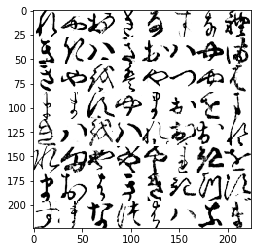

Training Linear...
Epoch: 0/2.. Test Accuracy: 0.450039803981781
Epoch: 1/2.. Test Accuracy: 0.44854697585105896
Training FeedForward...
Epoch: 0/2.. Test Accuracy: 0.6858081221580505
Epoch: 1/2.. Test Accuracy: 0.6980493664741516
Training CNN...
Epoch: 0/2.. Test Accuracy: 0.9169983863830566
Epoch: 1/2.. Test Accuracy: 0.9324243664741516


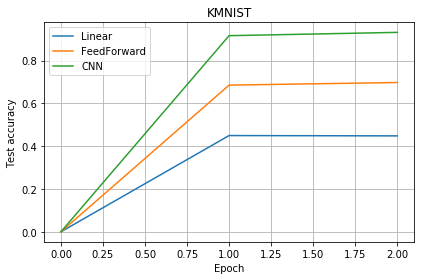

<Figure size 432x288 with 0 Axes>

In [3]:
#!/usr/bin/env python3
"""
part3.py

UNSW COMP9444 Neural Networks and Deep Learning

ONLY COMPLETE METHODS AND CLASSES MARKED "TODO".

DO NOT MODIFY IMPORTS. DO NOT ADD EXTRA FUNCTIONS.
DO NOT MODIFY EXISTING FUNCTION SIGNATURES.
DO NOT IMPORT ADDITIONAL LIBRARIES.
DOING SO MAY CAUSE YOUR CODE TO FAIL AUTOMATED TESTING.
"""
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


class Linear(nn.Module):
    """
    DO NOT MODIFY
    Linear (10) -> ReLU -> LogSoftmax
    """

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # make sure inputs are flattened

        x = F.relu(self.fc1(x))
        x = F.log_softmax(x, dim=1)  # preserve batch dim

        return x


class FeedForward(nn.Module):
    """
    TODO: Implement the following network structure
    Linear (256) -> ReLU -> Linear(64) -> ReLU -> Linear(10) -> ReLU-> LogSoftmax
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        
    
    def forward(self,x):
        # make sure inputs are flattened
        x = x.view(x.shape[0],-1)
        #the inputs are passed into the first layer
        output = self.fc1(x)
        #Relu is applied on the first set of output values
        output = F.relu(output)
        #the inputs are passed into the second layer
        output = self.fc2(output)
        #Relu is applied on the first set of output values
        output = F.relu(output)
        #the inputs are passed into the third layer
        output = self.fc3(output)
        #Relu is applied on the second set of output values
        output = F.relu(output)
        # preserve batch dim and call log_softmax
        final_output = F.log_softmax(output, dim=1)
        return final_output
        

class CNN(nn.Module):
    """
    TODO: Implement CNN Network structure

    conv1 (channels = 10, kernel size= 5, stride = 1) -> Relu -> max pool (kernel size = 2x2) ->
    conv2 (channels = 50, kernel size= 5, stride = 1) -> Relu -> max pool (kernel size = 2x2) ->
    Linear (256) -> Relu -> Linear (10) -> LogSoftmax


    Hint: You will need to reshape outputs from the last conv layer prior to feeding them into
    the linear layers.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(800,256)
        self.fc2 = nn.Linear(256,10)
        self.conv1 = nn.Conv2d(1,10,5,1)
        self.conv2 = nn.Conv2d(10,50,5,1)
        
    def forward(self,x):
        # make sure inputs are flattened
        #x = x.view(x.shape[0],-1)
        #x = x.view(-1,800)
        output = self.conv1(x)
        output = F.relu(output)
        output = F.max_pool2d(output,2,2)
        output = self.conv2(output)
        output = F.relu(output)
        output = F.max_pool2d(output,2,2)
        #print(output.shape)
        output = output.view(-1,800)
        output = self.fc1(output)
        output = F.relu(output)
        output = self.fc2(output)
        final_output = F.log_softmax(output, dim=1)
        return final_output
        

class NNModel:
    def __init__(self, network, learning_rate):
        """
        Load Data, initialize a given network structure and set learning rate
        DO NOT MODIFY
        """

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
        self.trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

        # Download and load the test data
        testset = datasets.KMNIST(root='./data', train=False, download=True, transform=transform)
        self.testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

        self.model = network

        """
        TODO: Set appropriate loss function such that learning is equivalent to minimizing the
        cross entropy loss. Note that we are outputting log-softmax values from our networks,
        not raw softmax values, so just using torch.nn.CrossEntropyLoss is incorrect.
        
        Hint: All networks output log-softmax values (i.e. log probabilities or.. likelihoods.). 
        """
        #NLLLoss calculates the loss function for log softmax values
        self.lossfn = torch.nn.NLLLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

        self.num_train_samples = len(self.trainloader)
        self.num_test_samples = len(self.testloader)

    def view_batch(self):
        """
        TODO: Display first batch of images from trainloader in 8x8 grid

        Do not make calls to plt.imshow() here

        Return:
           1) A float32 numpy array (of dim [28*8, 28*8]), containing a tiling of the batch images,
           place the first 8 images on the first row, the second 8 on the second row, and so on

           2) An int 8x8 numpy array of labels corresponding to this tiling
        """
        for images,labels in self.trainloader:
            break
        image = images[:64].numpy()
        label = labels[:64].numpy()
        #print(image.shape)
        test = images[:1].numpy()
        big_picture = np.zeros(224*224)
        big_picture = big_picture.reshape(224,224)
        #big_picture[0:28,0:28] = test
        for i in range(8):
            test = images[i:i+1].numpy()
            big_picture[0:28,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+8:i+9].numpy()
            big_picture[28:56,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+16:i+17].numpy()
            big_picture[56:84,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+24:i+25].numpy()
            big_picture[84:112,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+32:i+33].numpy()
            big_picture[112:140,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+40:i+41].numpy()
            big_picture[140:168,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+48:i+49].numpy()
            big_picture[168:196,(28*i):(28*(i+1))] = test
        for i in range(8):
            test = images[i+56:i+57].numpy()
            big_picture[196:224,(28*i):(28*(i+1))] = test
        label = np.reshape(label,(8,8))
        return big_picture,label

    def train_step(self):
        """
        Used for submission tests and may be usefull for debugging
        DO NOT MODIFY
        """
        self.model.train()
        for images, labels in self.trainloader:
            log_ps = self.model(images)
            loss = self.lossfn(log_ps, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            return

    def train_epoch(self):
        self.model.train()
        for images, labels in self.trainloader:
            log_ps = self.model(images)
            loss = self.lossfn(log_ps, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return

    def eval(self):
        self.model.eval()
        accuracy = 0
        with torch.no_grad():
            for images, labels in self.testloader:
                log_ps = self.model(images)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        return accuracy / self.num_test_samples


def plot_result(results, names):
    """
    Take a 2D list/array, where row is accuracy at each epoch of training for given model, and
    names of each model, and display training curves
    """
    for i, r in enumerate(results):
        plt.plot(range(len(r)), r, label=names[i])
    plt.legend()
    plt.title("KMNIST")
    plt.xlabel("Epoch")
    plt.ylabel("Test accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig("./part_2_plot.png")


def main():
    #models = [Linear(), FeedForward(), CNN()]   # Change during development
    models = [Linear(), FeedForward(), CNN()]
    epochs = 2
    results = []

    # Can comment the below out during development
    images, labels = NNModel(Linear(), 0.003).view_batch()
    print(labels)
    plt.imshow(images, cmap="Greys")
    plt.show()

    for model in models:
        print(f"Training {model.__class__.__name__}...")
        m = NNModel(model, 0.003)

        accuracies = [0]
        for e in range(epochs):
            m.train_epoch()
            accuracy = m.eval()
            print(f"Epoch: {e}/{epochs}.. Test Accuracy: {accuracy}")
            accuracies.append(accuracy)
        results.append(accuracies)

    plot_result(results, [m.__class__.__name__ for m in models])


if __name__ == "__main__":
    main()

In [117]:
x = np.arange(784)
x = np.reshape(x,(28,28))
y = np.arange(784,1568)
y = np.reshape(y,(28,28))
m = []
for n in range(0,len(x)):
    z = np.hstack((x[n],y[n]))
    print(z)
    m.append(z)
M = np.asarray(m)
M.reshape(-1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811]
[ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55 812 813 814 815 816 817 818 819
 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837
 838 839]
[ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83 840 841 842 843 844 845 846 847
 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865
 866 867]
[ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 868 869 870 871 872 873 874 875
 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893
 894 895]
[112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 13

array([   0,    1,    2, ..., 1565, 1566, 1567])

In [128]:
a = np.arange(50176)
a = np.reshape(a,(8,6272))
for n in a:
    n = np.reshape(n,(8,784))
    for i in range(0,len(n)):
        p = np.reshape(n[i],(28,28))
        q = np.reshape(n[i],(28,28))
        print(i)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27]
 [ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
   46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
   74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
  102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
  130 131 132 133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
  158 159 160 161 162 163 164 165 166 167]
 [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
  186 187 188 189 190 191 192 193 194 195]
 [196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
  214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 23

In [159]:
a = np.arange(28)
b = a + 784
step = 0
L = []
L.append(a)
for i in range(8):
    step +=784
    b = a + step
    L.append(b)
M = np.asarray(L)
M.reshape(-1)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,  784,  785,  786,  787,  788,
        789,  790,  791,  792,  793,  794,  795,  796,  797,  798,  799,
        800,  801,  802,  803,  804,  805,  806,  807,  808,  809,  810,
        811, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577,
       1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588,
       1589, 1590, 1591, 1592, 1593, 1594, 1595, 2352, 2353, 2354, 2355,
       2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366,
       2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2378, 2379, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144,
       3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155,
       3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3920, 3921, 3922,
       3923, 3924, 3925, 3926, 3927, 3928, 3929, 39

In [192]:
x = np.arange(784)
x = np.reshape(x,(28,28))
step = 784
L = []
#L.append(x[0])
for n in range(len(x)):
    #print(x[n])
    L.append(x[n])
    #temp = []
#     b = x[n] + step
#     c = b + step
#     d = c + step
#     e = d + step
#     f = e + step
#     g = f + step
#     h = g + step
#     L.append([x[n],b,c,d,e,f,g,h])
    for i in range(1,8):
        temp = []
        b = x[n] + (i * step)
        temp.append(b)
        #print(temp)
        L.extend(temp)
M = np.asarray(L)
M = M.reshape(-1)
N = M + 6272
O = N + 6272
P = O + 6272
Q = P + 6272
R = Q + 6272
S = R + 6272
T = S + 6272
big_picture = np.stack([M,N,O,P,Q,R,S,T])
big_picture = big_picture.reshape(-1)
big_picture = np.reshape(big_picture,(224,224))
big_picture

array([[    0,     1,     2, ...,  5513,  5514,  5515],
       [   28,    29,    30, ...,  5541,  5542,  5543],
       [   56,    57,    58, ...,  5569,  5570,  5571],
       ...,
       [44604, 44605, 44606, ..., 50117, 50118, 50119],
       [44632, 44633, 44634, ..., 50145, 50146, 50147],
       [44660, 44661, 44662, ..., 50173, 50174, 50175]])

In [135]:
import torch
tensor_one = torch.tensor([[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]]])
print(tensor_one.shape)
step = 0
# for i in range(tensor_one.shape[0]):
#     for j in range(tensor_one.shape[1]):
#         for k in range(tensor_one.shape[2]):
#             if k==step:
#                 print(tensor_one[i][j][k])
L = []
x = 0
for i in range(2):
    for n in tensor_one[0][0:i]:
        L.append(n[0])
L

torch.Size([1, 2, 3, 3])


[tensor([1, 2, 3])]

In [59]:
import numpy as np
# a = np.ones(28*28)
# b = np.zeros(224*224)
a = np.ones(16)
b = np.zeros(64)
b = b.reshape(8,8)
a = a.reshape(4,4)
b[0:4]
#a[0:4][0:4]
b[0:4,0:4] = a
b

array([[1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])